Dataset: [sleep-health-and-lifestyle-dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

In [61]:
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# svc
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as pltDecision
import matplotlib.pyplot as plt
import os


# Read Dataset

In [62]:

# columns
# Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder

file_name = "./Sleep_health_and_lifestyle_dataset.csv"
train_columns = ["Gender","Age","Sleep Duration","Quality of Sleep","Physical Activity Level","Stress Level","BMI Category","Blood Pressure","Heart Rate","Daily Steps"]
target_column = "Sleep Disorder"

df = pd.read_csv(file_name)
print(df.columns.tolist())

X = df[train_columns]
y = df[target_column]
df.head(15)


['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


# Data Preprocessing

In [64]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np


data_original = pd.read_csv(file_name)
# Drop 'Person ID' as it is not predictive
data = data_original.drop(columns=['Person ID'])

# Encode categorical columns
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

data['Sleep Disorder'] = data['Sleep Disorder'].fillna("None")
print(data.head(5))

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Replace None values in 'Sleep Disorder' with "None" string


# Split Blood Pressure into two columns: Systolic and Diastolic
data[['Systolic BP', 'Diastolic BP']] = data['Blood Pressure'].str.split('/', expand=True).astype(float)
data = data.drop(columns=['Blood Pressure'])


print(data.head(5))

# Extract features (X) and target (y)
X = data.drop(columns=['Sleep Disorder'])
y = data['Sleep Disorder']

# Normalize/scale numerical features for SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape



  Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0   Male   27     Software Engineer             6.1                 6   
1   Male   28                Doctor             6.2                 6   
2   Male   28                Doctor             6.2                 6   
3   Male   28  Sales Representative             5.9                 4   
4   Male   28  Sales Representative             5.9                 4   

   Physical Activity Level  Stress Level BMI Category Blood Pressure  \
0                       42             6   Overweight         126/83   
1                       60             8       Normal         125/80   
2                       60             8       Normal         125/80   
3                       30             8        Obese         140/90   
4                       30             8        Obese         140/90   

   Heart Rate  Daily Steps Sleep Disorder  
0          77         4200           None  
1          75        10000           Non

((299, 12), (75, 12))

In [65]:

print("Sleep Disorder:", end='\n\n')
print(data_original["Sleep Disorder"].head(), end='\n\n')
print(data["Sleep Disorder"].head(), end='\n\n')

print("Occupation:", end='\n\n')
print(data_original["Occupation"].head(), end='\n\n')
print(data["Occupation"].head(), end='\n\n')



Sleep Disorder:

0            NaN
1            NaN
2            NaN
3    Sleep Apnea
4    Sleep Apnea
Name: Sleep Disorder, dtype: object

0    1
1    1
2    1
3    2
4    2
Name: Sleep Disorder, dtype: int64

Occupation:

0       Software Engineer
1                  Doctor
2                  Doctor
3    Sales Representative
4    Sales Representative
Name: Occupation, dtype: object

0    9
1    1
2    1
3    6
4    6
Name: Occupation, dtype: int64



# Correlation 

Correlation Matrix (Sleep Disorder):
Physical Activity Level    0.433214
Daily Steps                0.342098
Diastolic BP               0.310051
Systolic BP                0.241786
Age                        0.232000
Heart Rate                 0.205987
Quality of Sleep           0.179592
Sleep Duration             0.177552
BMI Category               0.016573
Stress Level              -0.036058
Occupation                -0.169800
Gender                    -0.253415
Name: Sleep Disorder, dtype: float64


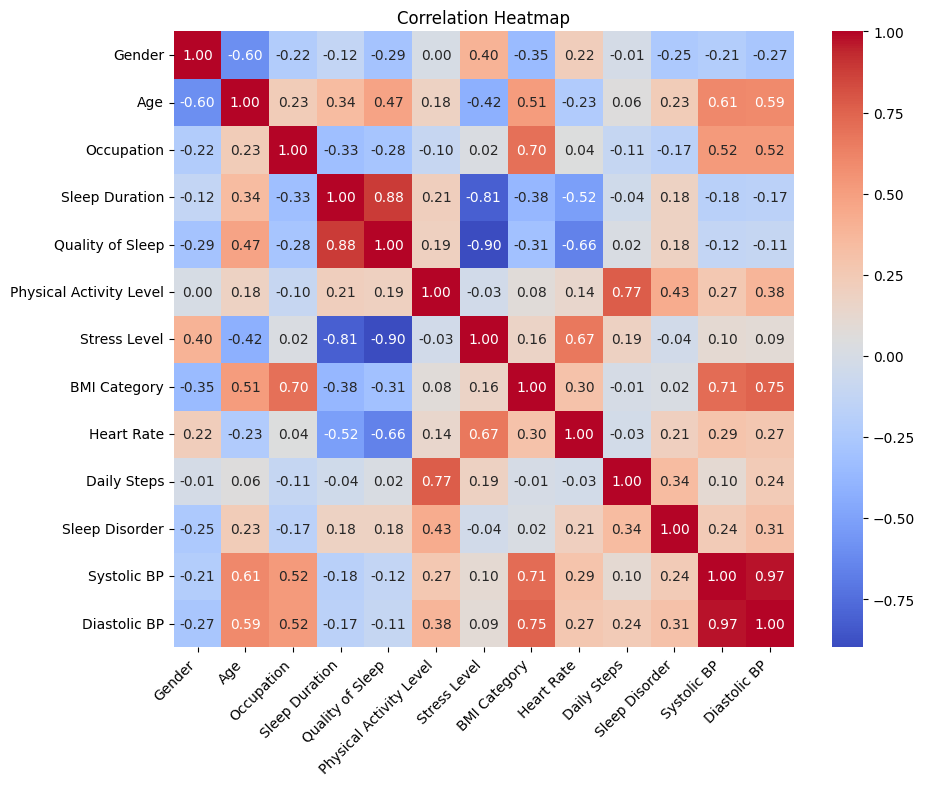

In [66]:
# Correlation  matrix
import seaborn as sns

# Calculate correlation matrix


correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation Matrix (Sleep Disorder):")
# print(correlation_matrix.head())

sleep_disorder_correlation = correlation_matrix["Sleep Disorder"].drop("Sleep Disorder")
sorted_sleep_disorder_correlation = sleep_disorder_correlation.sort_values(ascending=False)
print(sorted_sleep_disorder_correlation)


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.show()

In [67]:
# Chi-squared test
from sklearn.feature_selection import chi2

# Perform Chi-Squared Test for each categorical feature with respect to 'Sleep Disorder'

# Correctly select categorical features from the DataFrame
X_cats = data[['Gender', 'Occupation', 'BMI Category']]

# Ensure that the target variable is properly defined
y = data['Sleep Disorder']

# Perform the Chi-Squared test
chi2_values, p_values = chi2(X_cats, y)

# Create a DataFrame to store the results
chi2_results = pd.DataFrame({
    'Feature': X_cats.columns,
    'Chi2 Value': chi2_values,
    'P-Value': p_values
})

# Display the Chi-Squared test results
print(chi2_results)

# Filter for significant features (p-value < 0.05)
significant_features = chi2_results[chi2_results['P-Value'] < 0.05]
print("\nSignificant Features based on Chi-Squared Test:")
print(significant_features)



        Feature  Chi2 Value       P-Value
0        Gender   26.862604  1.468452e-06
1    Occupation  338.329511  3.409418e-74
2  BMI Category  374.767752  4.170774e-82

Significant Features based on Chi-Squared Test:
        Feature  Chi2 Value       P-Value
0        Gender   26.862604  1.468452e-06
1    Occupation  338.329511  3.409418e-74
2  BMI Category  374.767752  4.170774e-82


        Feature  Chi2 Value       P-Value
0        Gender   26.862604  1.468452e-06
1    Occupation  338.329511  3.409418e-74
2  BMI Category  374.767752  4.170774e-82


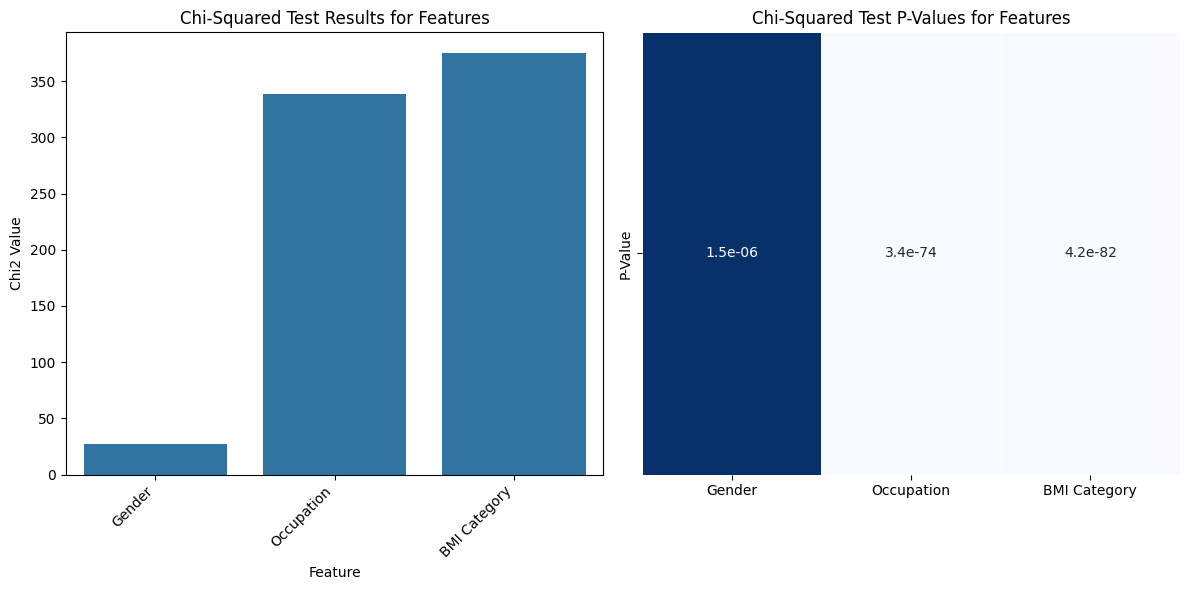

In [68]:
plt.figure(figsize=(12, 6))

print(chi2_results)
# Plotting Chi-Squared Values
plt.subplot(1, 2, 1)
sns.barplot(x='Feature', y='Chi2 Value', data=chi2_results.sort_values(by='Chi2 Value', ascending=True))
plt.title('Chi-Squared Test Results for Features')
plt.xticks(rotation=45, ha='right')

# Plotting p-values as a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(chi2_results[['P-Value']].T, xticklabels=chi2_results['Feature'], annot=True, cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Chi-Squared Test P-Values for Features')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [69]:
from sklearn.feature_selection import f_classif
# Apply ANOVA F-test
f_values, p_values = f_classif(X_scaled, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

# Display the ANOVA results
print(anova_results)

# You can use a threshold to select features based on p-value (e.g., p-value < 0.05 indicates significance)
significant_features = anova_results[anova_results['P-Value'] < 0.05]
print("\nSignificant Features based on ANOVA:")
print(significant_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the training and testing data
print(f"\nX_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

                    Feature     F-Value       P-Value
0                    Gender   31.510655  2.293822e-13
1                       Age   58.408963  8.852105e-23
2                Occupation  107.271989  1.724128e-37
3            Sleep Duration   31.913468  1.626151e-13
4          Quality of Sleep   27.600604  6.688642e-12
5   Physical Activity Level   44.150579  6.306184e-18
6              Stress Level    6.603565  1.520459e-03
7              BMI Category  324.217841  3.699233e-82
8                Heart Rate   32.948639  6.737408e-14
9               Daily Steps   24.776923  7.942397e-11
10              Systolic BP  214.585414  1.198027e-62
11             Diastolic BP  268.097906  9.232470e-73

Significant Features based on ANOVA:
                    Feature     F-Value       P-Value
0                    Gender   31.510655  2.293822e-13
1                       Age   58.408963  8.852105e-23
2                Occupation  107.271989  1.724128e-37
3            Sleep Duration   31.913468  1.6

# Train Model

In [70]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

xgb_accuracy, svm_accuracy

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.96, 0.9733333333333334)

In [71]:
# Modify XGBoost parameters to speed up training
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=50, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Re-check SVM training and prediction
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

xgb_accuracy, svm_accuracy

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


(0.9733333333333334, 0.9733333333333334)

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


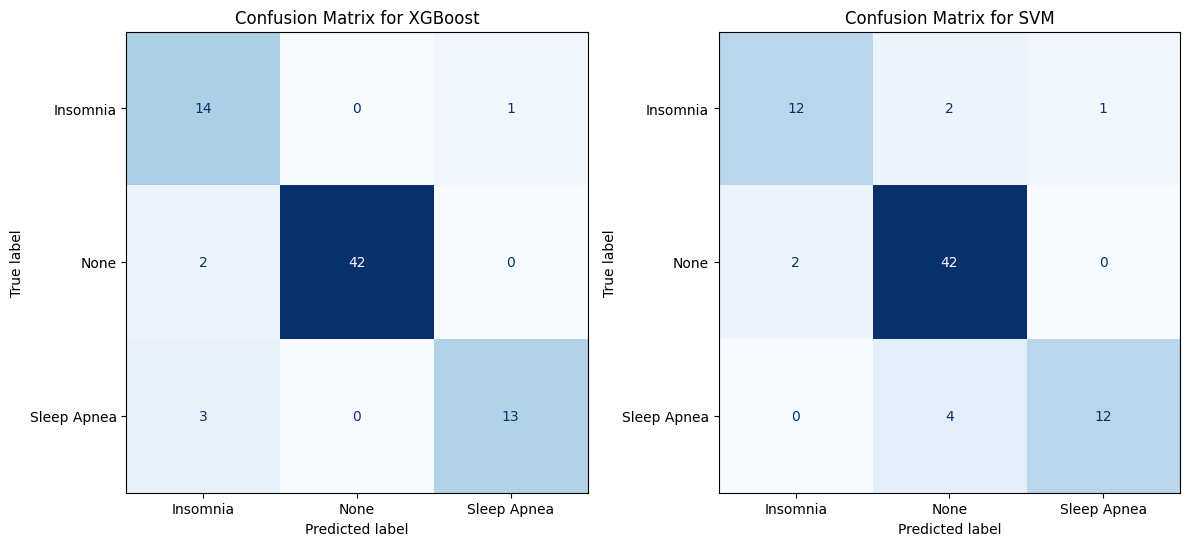

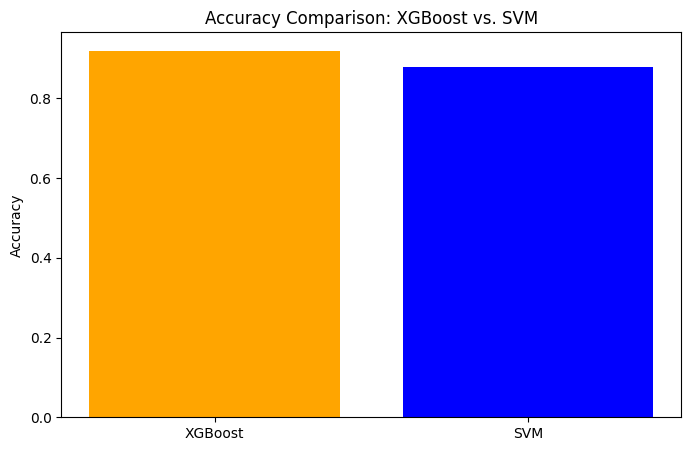

(0.92, 0.88)

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures

# Add interaction terms (Feature Engineering)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Perform PCA for feature reduction (optional step to handle high-dimensional data)
pca = PCA(n_components=4)  # Retain original number of features for now
X_pca = pca.fit_transform(X_poly)

# Re-split the enhanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost with enhanced features
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM with enhanced features
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "SVM"],
    [xgb_predictions, svm_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['Sleep Disorder'].classes_)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Bar chart for accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'SVM'], [xgb_accuracy, svm_accuracy], color=['orange', 'blue'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: XGBoost vs. SVM')
plt.show()

xgb_accuracy, svm_accuracy

# Decision Tree v.s XGBoost v.s SVM

/home/jialong/Programming/myrepo/tku-113-1-statistics-report/.venv/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [21:57:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


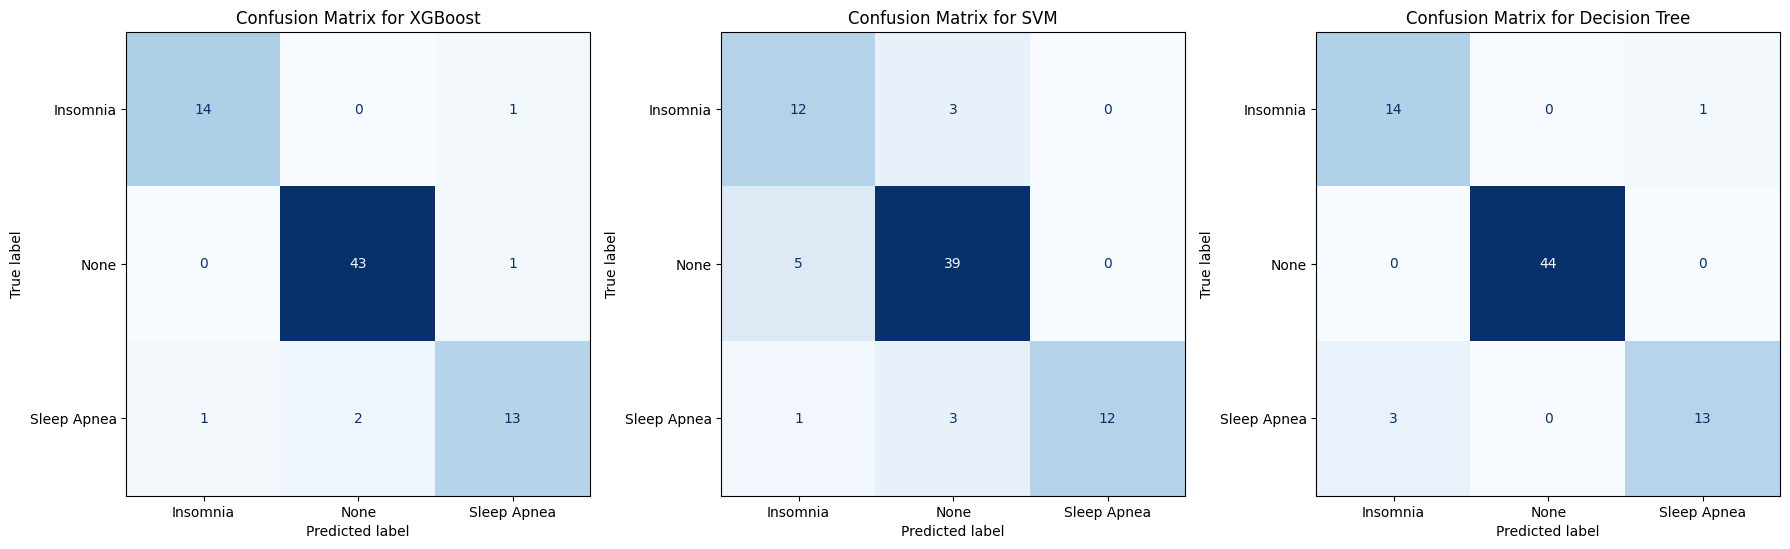

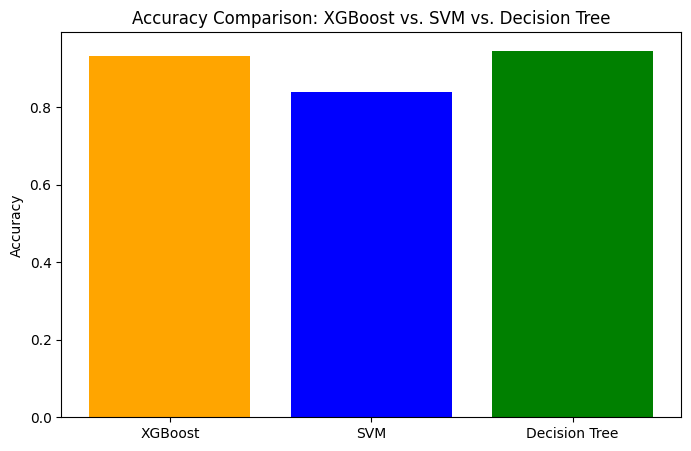

XGBoost Accuracy: 0.9333
SVM Accuracy: 0.8400
Decision Tree Accuracy: 0.9467


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Feature Engineering: Add interaction terms
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=4)  # Adjust number of components as needed
X_pca = pca.fit_transform(X_poly)

# Train-Test Split with enhanced features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=42, n_estimators=20, max_depth=4)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# Train SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, model_name, predictions in zip(
    axes,
    ["XGBoost", "SVM", "Decision Tree"],
    [xgb_predictions, svm_predictions, dt_predictions]
):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(label_encoders["Sleep Disorder"].inverse_transform(y)))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Accuracy Comparison Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(['XGBoost', 'SVM', 'Decision Tree'], [xgb_accuracy, svm_accuracy, dt_accuracy], color=['orange', 'blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: XGBoost vs. SVM vs. Decision Tree')
plt.show()

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# SVM

In [74]:
df = convert_to_categories(data_original)

df = df.drop("Occupation", axis=1)

X = df[train_columns]
y = df[target_column]
df.head(15)

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1,27,6.1,6,42,6,2,126,77,4200,0.0
1,2,1,28,6.2,6,60,8,0,125,75,10000,0.0
2,3,1,28,6.2,6,60,8,0,125,75,10000,0.0
3,4,1,28,5.9,4,30,8,3,140,85,3000,1.0
4,5,1,28,5.9,4,30,8,3,140,85,3000,1.0
5,6,1,28,5.9,4,30,8,3,140,85,3000,2.0
6,7,1,29,6.3,6,40,7,3,140,82,3500,2.0
7,8,1,29,7.8,7,75,6,0,120,70,8000,0.0
8,9,1,29,7.8,7,75,6,0,120,70,8000,0.0
9,10,1,29,7.8,7,75,6,0,120,70,8000,0.0


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

df_train_std = pd.DataFrame(X_train_std[:5], columns = train_columns)
df_train_std




,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1.044466,0.055811,-0.833457,-1.155098,-0.728644,0.956601,1.078311,0.186918,0.481081,-0.554643
1,1.044466,-1.111141,-1.468533,-1.155098,-1.450369,1.522984,-0.930505,-0.448177,0.481081,-1.180447
2,1.044466,-0.877751,0.436694,0.537913,-0.006920,-0.176166,0.073903,-1.083272,-0.014076,0.696966
3,-0.957427,1.922934,1.325801,1.384419,0.714805,-1.308933,1.078311,1.457107,-0.509234,0.071162
4,-0.957427,-1.577922,-0.833457,-2.001604,-0.969219,0.956601,0.073903,0.440955,2.461710,-1.806251


In [76]:
# Radial Basis Function Kernel
svm = SVC(kernel = 'rbf', C = 1.0, random_state = 42)
svm.fit(X_train_std, y_train)

sbs = SFS(svm, k_features = 2, forward = True, verbose = 2, scoring = 'accuracy', cv = 4)
sbs.fit(X_train_std, y_train)

selected_features = list(sbs.k_feature_idx_)
print(selected_features)

y_pred = svm.predict(X_test_std)
# sbs acc
print(accuracy_score(y_test, y_pred))


[5, 7]
0.8933333333333333



[2024-12-19 21:57:51] Features: 1/2 -- score: 0.8093243243243243
[2024-12-19 21:57:51] Features: 2/2 -- score: 0.9130180180180181

[5, 7]


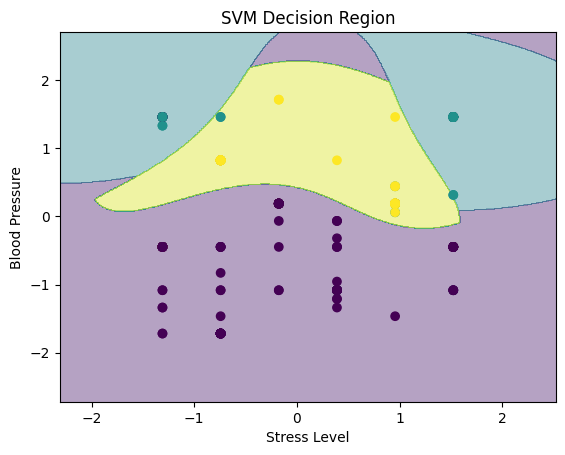

In [77]:

f1, f2 = selected_features
svm.fit(X_train_std[:, selected_features], y_train)
print(selected_features)

x_min, x_max = X_train_std[: , f1].min() - 1, X_train_std[: , f1].max() + 1
y_min, y_max = X_train_std[: , f2].min() - 1, X_train_std[: , f2].max() + 1


# print(x_min, x_max)
# print(y_min, y_max)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.4, cmap = 'viridis')
plt.scatter(X_train_std[:, f1], X_train_std[:, f2], c = y_train, cmap = 'viridis')
plt.xlabel(train_columns[f1])
plt.ylabel(train_columns[f2])
plt.title("SVM Decision Region")
plt.show()


329    0.0
33     0.0
15     0.0
325    0.0
57     0.0
      ... 
94     2.0
195    2.0
312    0.0
292    1.0
372    1.0
Name: Sleep Disorder, Length: 75, dtype: float64 [0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 1. 0. 2. 0. 0. 0. 0. 0. 2.
 2. 0. 2. 2. 2. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 2. 1. 1. 2. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 2. 1. 2. 1. 1. 0. 0. 2. 0. 0. 2. 0. 2. 0. 0. 0. 0. 2.
 0. 1. 1.]


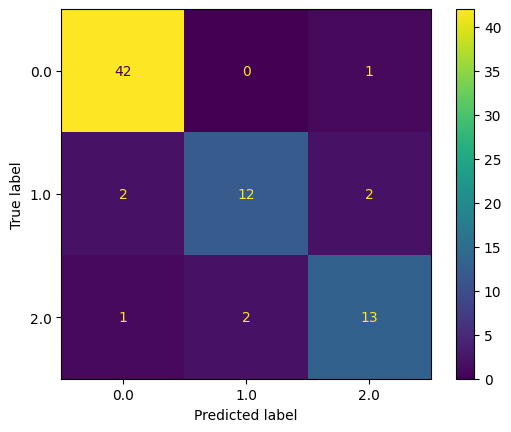

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(y_test, y_pred)

confusion_matrix(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
plt.show()



In [79]:

print(f"Accuracy Score: {round(accuracy_score(y_test, y_pred)*100, 2)}%")
print(f"Precision Score: {round(precision_score(y_test, y_pred, average = 'macro')*100, 2)}%")
print(f"Recall Score: {round(recall_score(y_test, y_pred, average = 'macro')*100, 2)}%")
print(f"F1 Score: {round(f1_score(y_test, y_pred, average = 'macro')*100, 2)}%")



Accuracy Score: 89.33%
Precision Score: 86.77%
Recall Score: 84.64%
F1 Score: 85.57%
